# 분류와 회귀

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.style.use('fivethirtyeight'),
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math

In [5]:
import os
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [6]:
from sklearn.model_selection import train_test_split

## 분류(classification)

- 이진분류
    - 두개의 클래스로 분류. 답이 예/아니오로 나뉨

- 다중분류
    - 세개 이상의 클래스로 분류.
    - ex) 붓꽃의 종류 판단

## 회귀(regression)

연속적인 숫자 또는 부동소수점수(실수)를 예측하는것

ex) 사람의 교육수준, 나이, 주거지를 바탕으로 그 사람의 연간 소득을 예측

# 과대적합과 과소적합

## 과대적합(overfitting)

가진 정보를 많이 사용해서 너무 복잡한 모델을 만드는 것.   
모델이 train set에 너무 적합되어있어 새로운 데이터에 일반화 되기 어려울 때 발생한다.   

즉 기존 data에 대해서는 잘 정확도가 높지만 새로운 데이터에 대해서는 정확도가 떨어지는 것


## 과소적합(underfitting)

너무 간단한 모델이 선택되어 데이터에 중요한 포인트를 잡지 못하는 것.   

# 지도학습 알고리즘

### 두개의 특성을 가진 forge DataSet

X.shape : (26, 2)


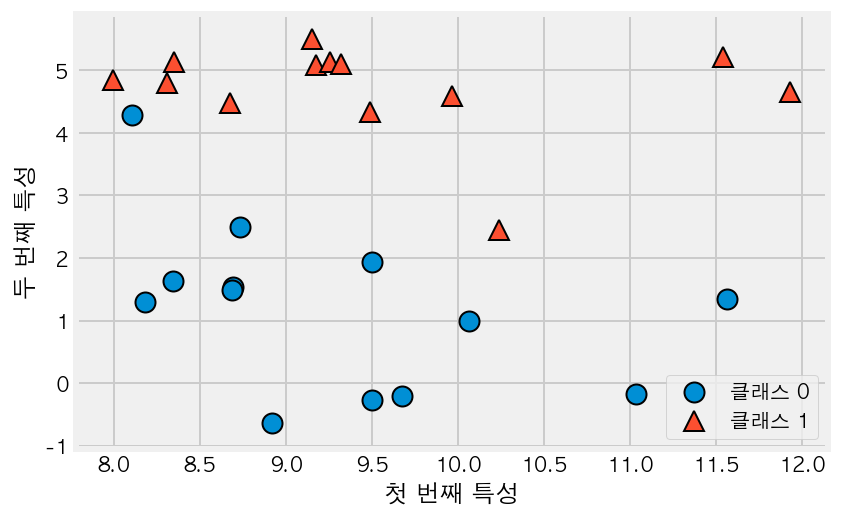

In [4]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["클래스 0","클래스 1"],loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")

print("X.shape :",X.shape)

### 회귀 알고리즘

입력특성 하나와 모델링할 타깃변수

Text(0, 0.5, '타깃')

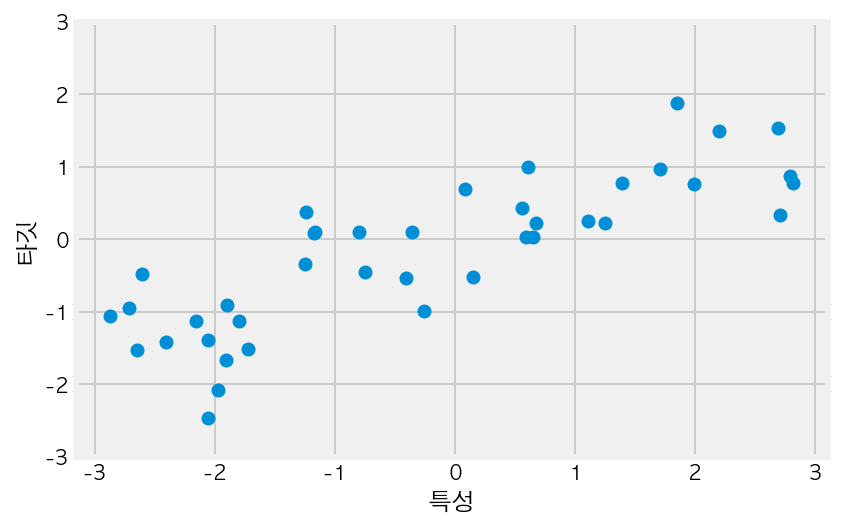

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

## 유방암 종양의 임상 데이터를 통해 종양이 악성인지 예측

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
cancer.data.shape

(569, 30)

In [8]:
print("class 별 샘플 개수 : \n",{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

class 별 샘플 개수 : 
 {'malignant': 212, 'benign': 357}


In [9]:
print("특성 이름:\n",cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# K-NN(Nearest Neighbors)

## 보스턴 주택가격 데이터셋

회귀분석용 데이터셋

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태 : ",boston.data.shape)

데이터의 형태 :  (506, 13)


In [11]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:",X.shape)

X.shape: (506, 104)


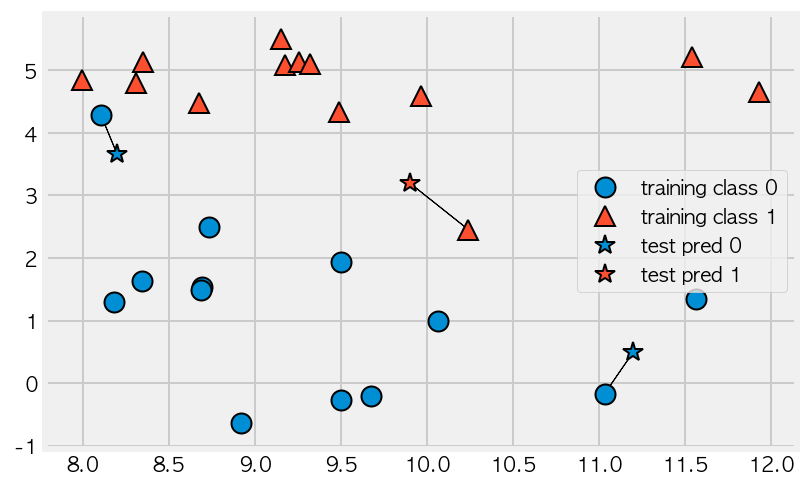

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

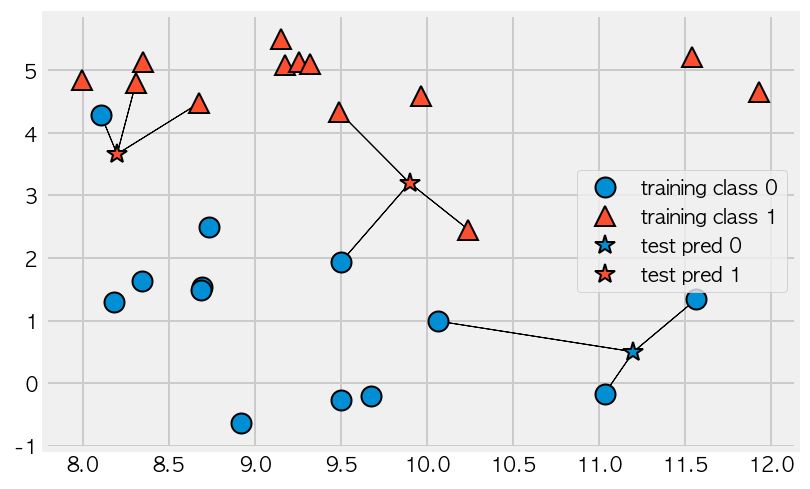

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [14]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
print("테스트 세트 예측 :",clf.predict(X_test))

테스트 세트 예측 : [1 0 1 0 1 0 0]


In [18]:
print("testSet 정확도 :{:.2f}".format(clf.score(X_test, y_test)))

testSet 정확도 :0.86


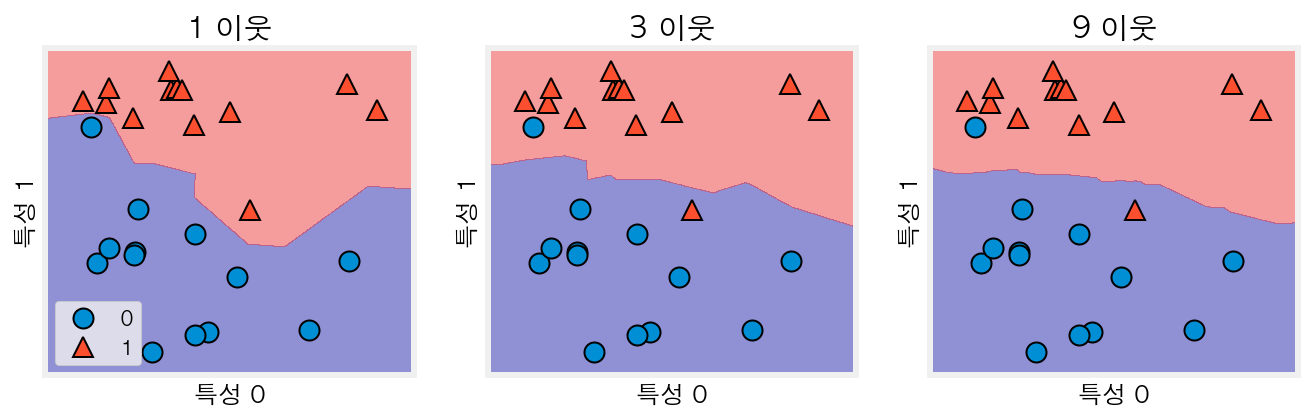

In [19]:
f, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

axes[0].legend(loc=3)

이웃의 수를 늘릴수록 결정 경계는 더 부드러워진다.
부드러운 경계는 더 단순한 모델을 의미한다.

즉 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도가 낮아진다!

### 모델의 복잡도와 일반화 사이의 관계

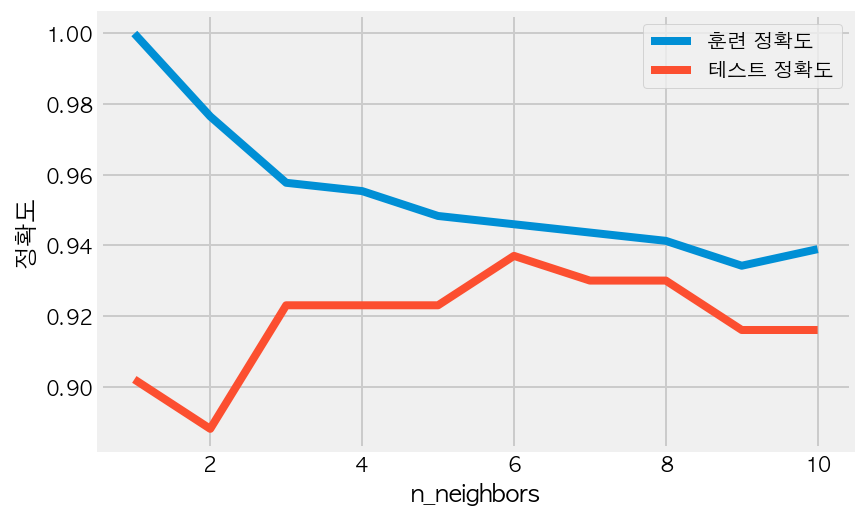

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label = "테스트 정확도")

plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

1-최근접 이웃이 모델을 너무 복잡하게 만든다는 것(overfitting)을 보여준다.   
반대로 이웃을 10개 사용했을 때는 model이 너무 단순해서(underfitting) 정확도가 나빠진다.   


## k-최근접 이웃 회귀

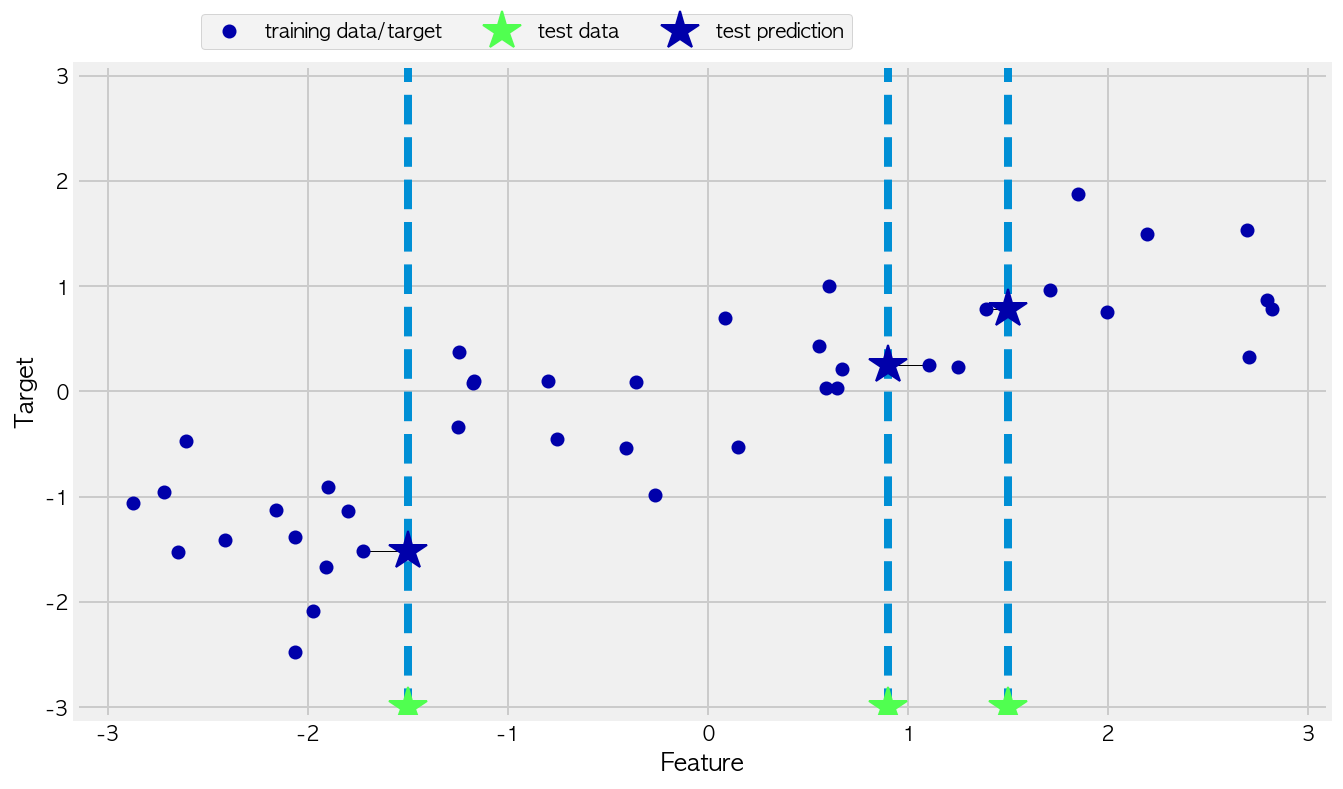

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

여러개의 최근접 이웃을 사용할 경우 이웃간의 평균이 예측된다.

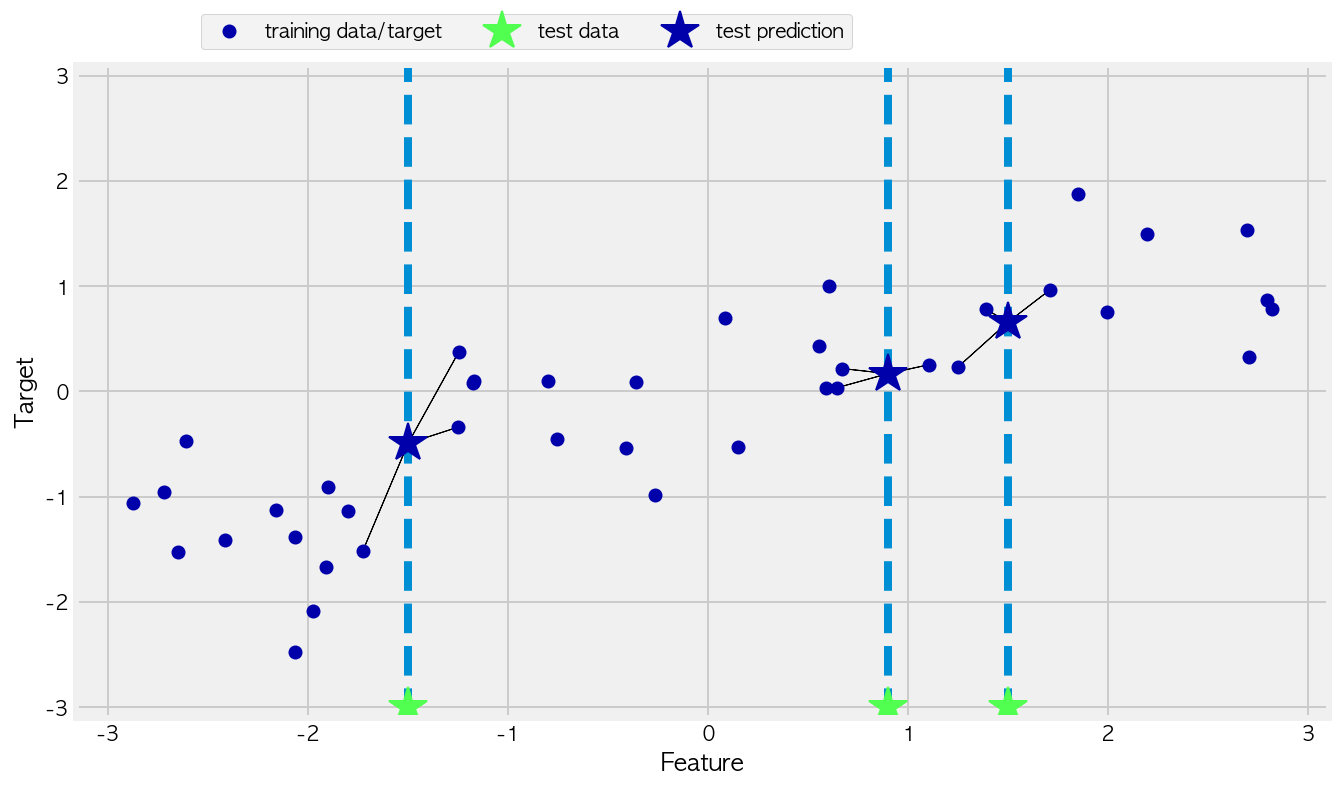

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
print("테스트 세트 예측:\n",reg.predict(X_test))


테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [25]:
print("testSet R^2: {:.2f}".format(reg.score(X_test, y_test)))

testSet R^2: 0.83


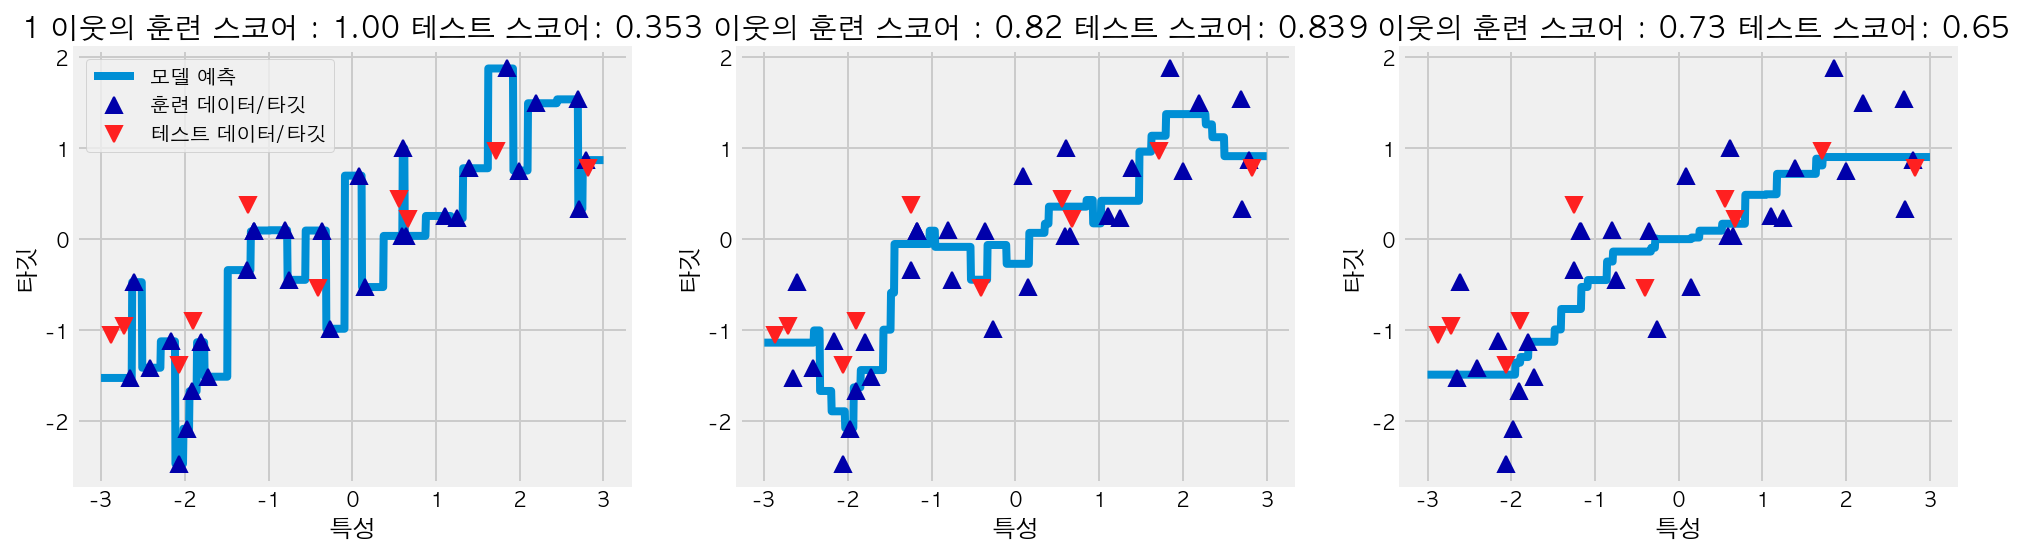

In [26]:
fig, axes = plt.subplots(1,3, figsize = (15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} 이웃의 훈련 스코어 : {:.2f} 테스트 스코어: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")

axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

이웃을 하나만 사용할 때는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터포인트를 모두 지나간다.

이는 매우 불안정한 예측을 만들어낸다.   

이웃을 많이 사용하면 훈련 데이터에는 잘 안맞을 수 있지만 더 안정된 예측을 얻게 된다.

## k-NN 알고리즘 장점

이해하기가 매우 쉽고 많이 조정하지 않아도 자주 좋은 성능을 발휘한다.   
데이터 전처리가 매우 중요하다.   
훈련세트가 크면 예측이 느려진다.   
너무 많은(수백개 이상) 특성을 가진 데이터셋에는 잘 동작하지 않고, 특성 값 대부분이 0인(희소한) 데이터셋과는 잘 작동하지 않는다.

## 선형모델 (linear model)

입력 특성에 대한 **선형 함수**를 만들어 사용한다.

### 회귀 선형 모델

$$ \hat y = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b$$

이 식에서 $x[0]$부터 $x[p]$까지는 하나의 데이터포인트에 대한 특성을 나타내며(특성의 개수:p+1), w와 b는 모델이 학습할 파리미터(parameter)를 나타낸다.   
$\hat y$는 모델이 만들어낸 예측값이다.

w[0]: 0.393906  b: -0.031804


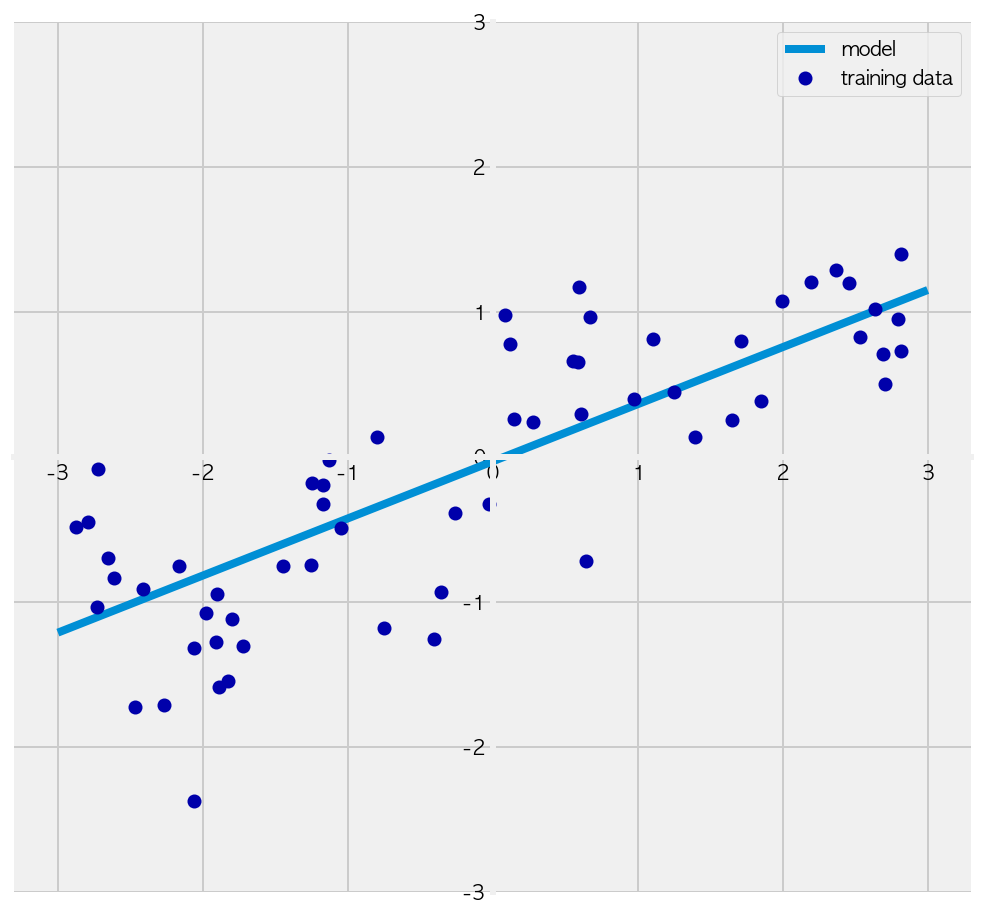

In [33]:
mglearn.plots.plot_linear_regression_wave()

## 선형 회귀(Linear Regression)

예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차를 최소화하는 파라미터 w와 b를 찾는다.

In [8]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

기울기 파라미터(w)는 가중치 또는 계수라고 하며 lr객체의 coef_ 속성에 저장되어 있고, 편향 또는 절편(b)는 intercept_ 속성에 저장되어 있다.

In [10]:
print("lr.coef_ :",lr.coef_)
print("lr.intercept_ :",lr.intercept_)

lr.coef_ : [0.39390555]
lr.intercept_ : -0.03180434302675976


sklearn은 훈련 데이터에서 유도된 속성은 항상 끝에 _를 붙인다.   

intercept_ 속성은 항상 하나의 실수값 이지만 coef_는 각 입력 특성에 하나식 대응되는 Numpy 배열이다.

In [11]:
print("TrainSet score : {:.2f}".format(lr.score(X_train, y_train)))
print("TestSet score : {:.2f}".format(lr.score(X_test, y_test)))

TrainSet score : 0.67
TestSet score : 0.66


훈련과 테스트셋 점수가 거의 비슷한 것으로 보아 과소적함 상태임을 알 수 있다. 

### Boston 주택 가격 데이터셋

In [12]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [13]:
print("TrainSet score : {:.2f}".format(lr.score(X_train, y_train)))
print("TestSet score : {:.2f}".format(lr.score(X_test, y_test)))

TrainSet score : 0.95
TestSet score : 0.61


이번에는 훈련셋에서는 점수가 높지만 데스트셋에서는 점수가 매우 낮다.   
이것은 모델이 과대적합되었다는 확실한 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야 한다.

## 리지 회귀

 리지회귀에서의 가중치(w)선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목족도 있다. 따라서 가중치의 절댓값을 최대한 작게 만들어야 한다.   
 이를 통해 모든 특성이 출력에 주는 영향을 최소한으로 만들어 과대적합이 되지 않도록 모델을 강제로 제한하는 것이다.

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("TrainSet score : {:.2f}".format(ridge.score(X_train, y_train)))
print("TestSet score : {:.2f}".format(ridge.score(X_test, y_test)))

TrainSet score : 0.89
TestSet score : 0.75


LinearRegression보다 모델복잡도가 낮아져 과대적합이 적어진 것을 확인할 수 있다.

alpha 라는 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지 지정할 수 있다.
alpha값을 높이면 계수를 0에 더 가깝게 만들어 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있다.

In [18]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("TrainSet score : {:.2f}".format(ridge10.score(X_train, y_train)))
print("TestSet score : {:.2f}".format(ridge10.score(X_test, y_test)))

TrainSet score : 0.79
TestSet score : 0.64


In [20]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("TrainSet score : {:.2f}".format(ridge01.score(X_train, y_train)))
print("TestSet score : {:.2f}".format(ridge01.score(X_test, y_test)))

TrainSet score : 0.93
TestSet score : 0.77


보니까 이 데이터에서는 0.1이 좋은 성능을 보여주고 있다.

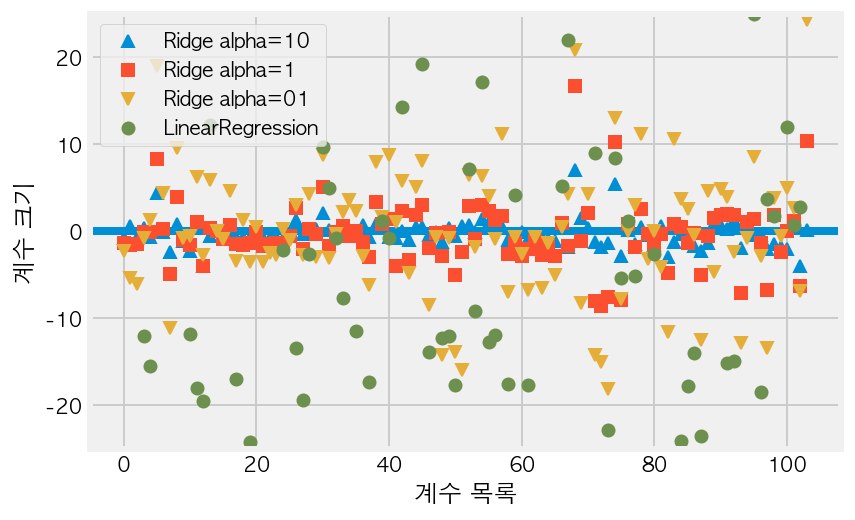

In [21]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=01")

plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

x축은 coef_의 원소를 위치대로 나열한 것이다. 즉 x=0은 첫번째 특성에 연관된 계수이고 x=1은 두번째 특성에 연관된 계수이다.  

alpha = 10일 때 대부분의 계수는 -3과 3 사이에 위치하고, 1일때는 범위가 좀 더 넓어지고, 0.1일 때는 그림 밖을 넘어갈 정도로 범위가 넓어진 것을 볼 수 있다.

규제에 대한 두번째 방법은 alpha값을 고정하고 훈련데이터의 크기를 변화시키는 것이다.

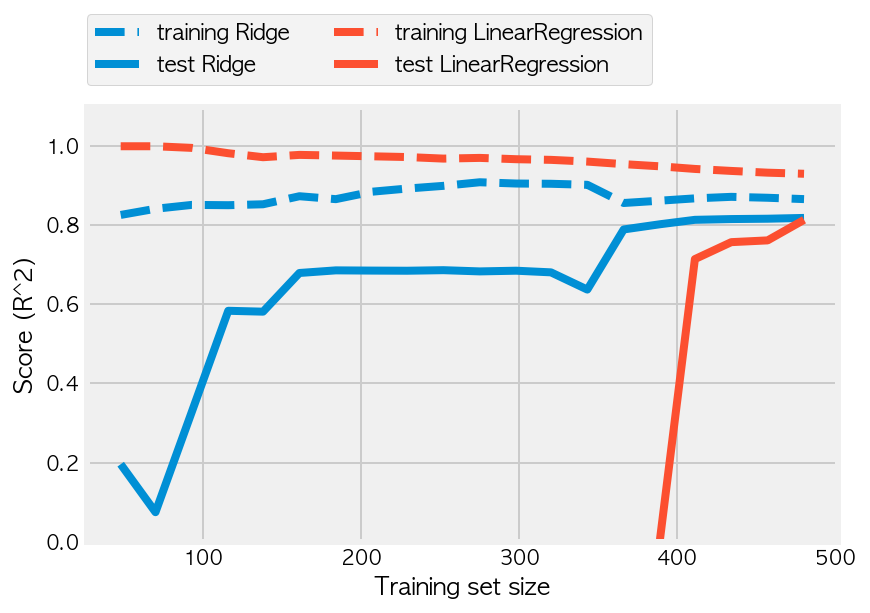

In [23]:
mglearn.plots.plot_ridge_n_samples()

400개 미만의 데이터가 주어질 때 선형회귀는 아예 학습을 못하고 있다. 그러나 데이터가 많아질 수록 선형회귀 모델의 성능이 좋아지고 있다.   
즉 데이터가 충분히 주어지면 규제 항은 덜 중요해져서 리지회귀와 선형회귀의 성능이 같아질것이라는 것이다.   

또한 중요한 점은 선형회귀의 TrainSet 성능이 줄어든다는 것이다. 이는 데이터가 많아질 수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문이다.

## 라소(Lasso)

L1규제. 계수를 0에 가깝게 만드는데 어떤 계수는 정말 0 이 됨. => 모델에서 완전히 제외되는 특성이 생긴다는 뜻

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("TrainSet score : {:.2f}".format(lasso.score(X_train, y_train)))
print("TestSet score : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성 수 :",np.sum(lasso.coef_ != 0))

TrainSet score : 0.29
TestSet score : 0.21
사용한 특성 수 : 4


과소적합이 일어났다. 역시 alpha를 이용해 계수를 조절할 수 있다.

In [28]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("TrainSet score : {:.2f}".format(lasso001.score(X_train, y_train)))
print("TestSet score : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성 수 :",np.sum(lasso001.coef_ != 0))

TrainSet score : 0.90
TestSet score : 0.77
사용한 특성 수 : 33


alpha값을 낮추면 모델의 복잡도가 증가하여 훈련세트와 테스트셋에서 성능은 좋아지지만 너무 낮추게 되면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해진다.

In [29]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("TrainSet score : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("TestSet score : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성 수 :",np.sum(lasso00001.coef_ != 0))

TrainSet score : 0.95
TestSet score : 0.64
사용한 특성 수 : 96


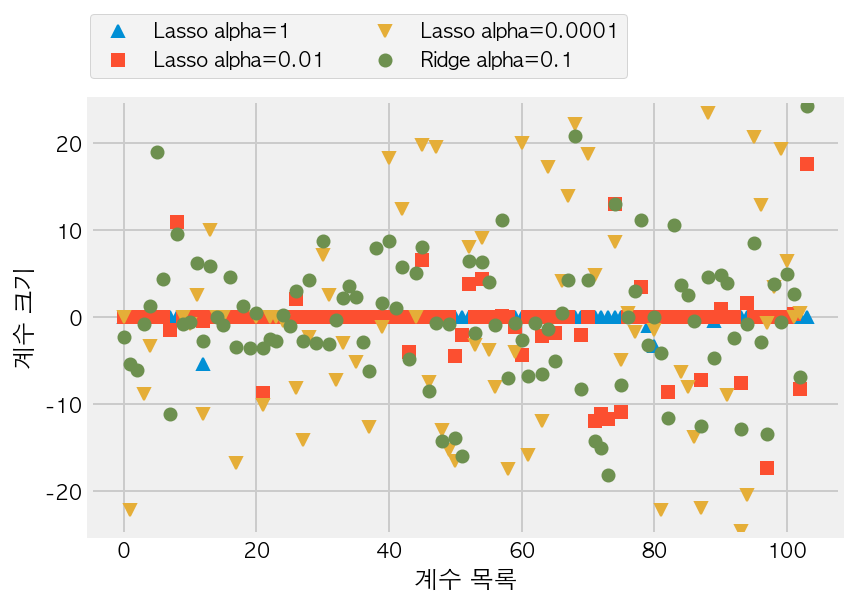

In [30]:
plt.plot(lasso.coef_, '^', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 's', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

plt.ylim(-25,25)
plt.legend(ncol=2, loc=(0,1.05))

## 분류용 선형 모델

### 이진 분류

$$ \hat y = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b > 0$$

함수에서 계산한 값이 0보다 작으면 클래스를 -1, 0보다 크면 1이라고 예측한다.

### LogisticRegression vs LinearSVC

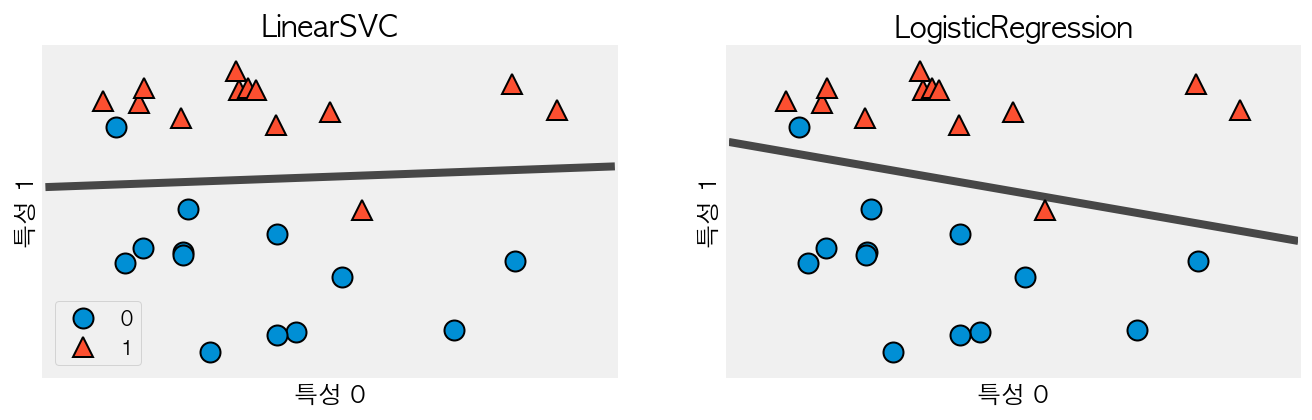

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

f, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend()

LogisticRegression 과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C이다.   
C값이 높아지면 규제가 감소한다. 다시말해 C가 높으면 훈련 세트에 맞춰지게 되고, C값을 낮추면 모델은 계수 벡터(w)가 0에 가까워지는 것이다.

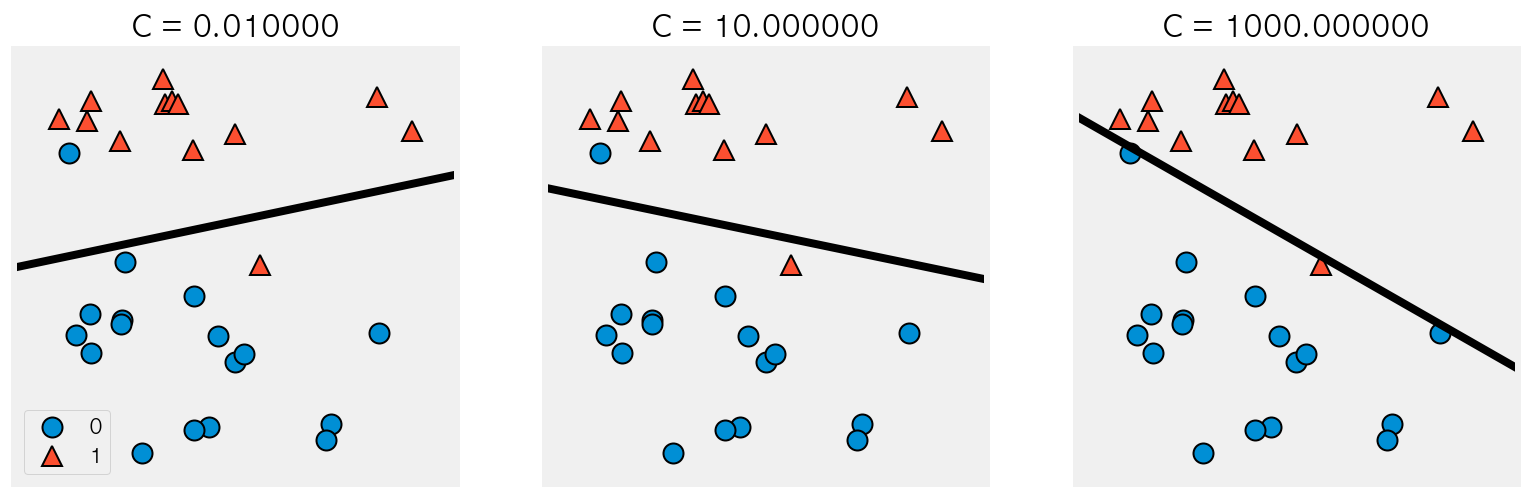

In [47]:
mglearn.plots.plot_linear_svc_regularization()

In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

print("TrainSet score : {:.3f}".format(logreg.score(X_train, y_train)))
print("TestSet score : {:.3f}".format(logreg.score(X_test, y_test)))

TrainSet score : 0.958
TestSet score : 0.958


In [13]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)

print("TrainSet score : {:.3f}".format(logreg100.score(X_train, y_train)))
print("TestSet score : {:.3f}".format(logreg100.score(X_test, y_test)))

TrainSet score : 0.979
TestSet score : 0.965


Train과 Test 셋 둘 다 정확도가 증가했다. 이는 복잡도가 높은 모델일수록 성능이 좋음을 말해준다.

In [14]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)

print("TrainSet score : {:.3f}".format(logreg001.score(X_train, y_train)))
print("TestSet score : {:.3f}".format(logreg001.score(X_test, y_test)))

TrainSet score : 0.953
TestSet score : 0.951


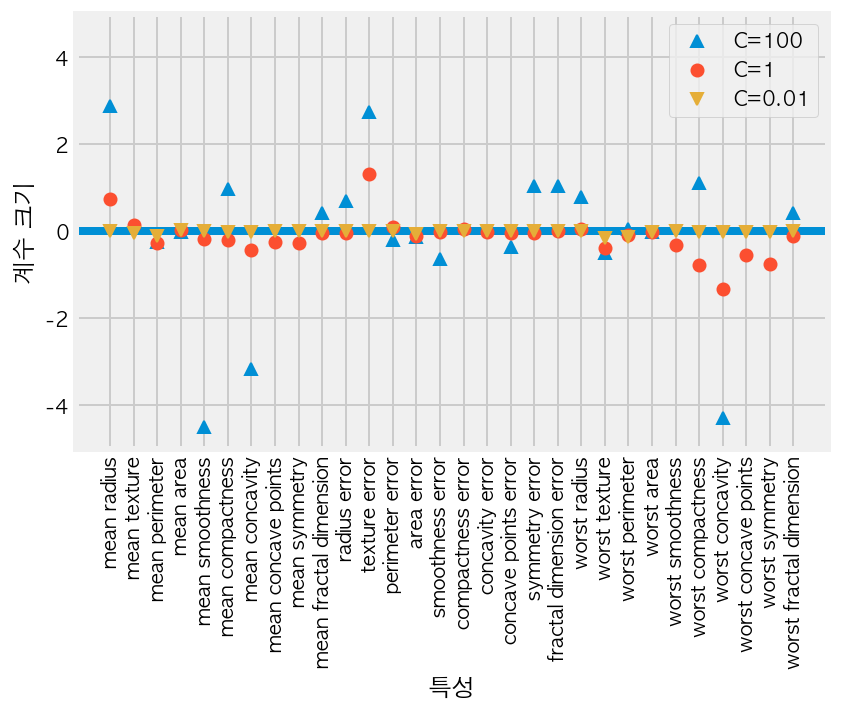

In [16]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.legend()

### L1규제를 사용한 모델

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001인 l1 로지스틱 회귀의 테스드 정확도: 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스드 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스드 정확도: 0.98


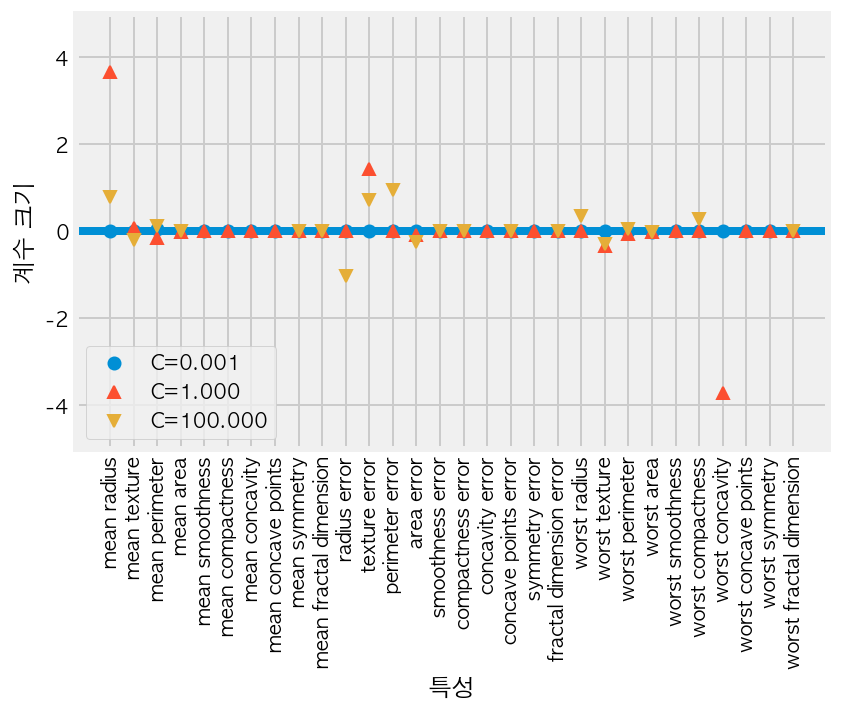

In [18]:
for C, marker in zip([0.001, 1, 100], ['o','^','v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스드 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)

